In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import itertools

In [8]:
data = pd.read_parquet("datas/final_df_day_2014_訓練資料.parquet")
data.shape

(4261, 166)

In [9]:
data=data[data.index.weekday < 5]
data.shape

(4261, 166)

In [17]:
# 创建XGBoost分类器
model = xgb.XGBClassifier(
    n_estimators=100,  # 与原RandomForest保持一致的树数量
    max_depth=30,  # 树的最大深度
    learning_rate=0.03,  # 学习率
    min_child_weight=1,  # 最小子节点权重
    subsample=0.3,  # 训练每棵树时使用的样本比例
    colsample_bytree=0.8,  # 训练每棵树时使用的特征比例
    objective="binary:logistic",  # 二分类问题
    early_stopping_rounds=30,
    random_state=1,
    reg_alpha=0.5,  # 若要添加L1正則化
)

# 划分训练集和测试集
train = data.iloc[:-500]
test = data.iloc[-500:]

predictors = [
    "ES_1d_return",
    "ES_5d_return",
    "ES_60d_return",
    "ES_120d_return",
    "ES_ma5d",
    "ES_ma60d",
    "ES_ma120d",
    "ES_trend5",
    "ES_trend60",
    "ES_trend120",
    # "FFI_1d_return",
    # "FFI_5d_return",
    # "FFI_60d_return",
    # "FFI_120d_return",
    "FFI_ma5d",
    "FFI_ma60d",
    "FFI_ma120d",
    "FFI_trend5",
    "FFI_trend60",
    "FFI_trend120",
    "VIX_Close",
    "VIX_1d_return",
    "VIX_5d_return",
    "VIX_60d_return",
    "VIX_120d_return",
    "VIX_ma5d",
    "VIX_ma60d",
    "VIX_ma120d",
    "VIX_trend5",
    "VIX_trend60",
    "VIX_trend120",
    "TWII_1d_return",
    "TWII_5d_return",
    "TWII_60d_return",
    "TWII_120d_return",
    "TWII_ma5d",
    "TWII_ma60d",
    "TWII_ma120d",
    "TWII_trend5",
    "TWII_trend60",
    "BRENT_1d_return",
    "BRENT_5d_return",
    "BRENT_60d_return",
    "BRENT_120d_return",
    "BRENT_ma5d",
    "BRENT_ma60d",
    "BRENT_ma120d",
    "BRENT_trend5",
    "BRENT_trend20",
    "BRENT_trend60",
    "USD_1d_return",
    "USD_5d_return",
    "USD_60d_return",
    "USD_120d_return",
    "USD_ma5d",
    "USD_ma60d",
    "USD_ma120d",
    "USD_trend5",
    "USD_trend60",
    "USD_trend120",
    "COPPER_1d_return",
    "COPPER_5d_return",
    "COPPER_60d_return",
    "COPPER_120d_return",
    "COPPER_ma5d",
    "COPPER_ma60d",
    "COPPER_ma120d",
    "COPPER_trend5",
    "COPPER_trend60",
    "COPPER_trend120",
    "GOLD_1d_return",
    "GOLD_5d_return",
    "GOLD_60d_return",
    "GOLD_120d_return",
    "GOLD_ma5d",
    "GOLD_ma60d",
    "GOLD_ma120d",
    "GOLD_trend5",
    "GOLD_trend60",
    "GOLD_trend120",
    "ES_atr",
    "ES_k",
    "ES_d",
    "ES_macd_hist",
    "ES_month",
    "coreCPI",
    # "coreCPI-漲跌",
    # "coreCPI-YoY",
    "fedRate",
    # "fedRate-漲跌",
    # "fedRate-YoY",
    "NonFarm",
    # "NonFarm-漲跌",
    # "NonFarm-YoY",
    "PMI",
    # "PMI-漲跌",
    # "PMI-YoY",
    "T10Y",
    "T10Y-MA10",
    # "T10Y-MA10_漲跌",
    # "T10Y-MA10_YoY",
    "T10Y2Y",
    "T10Y2Y-MA10",
    # "T10Y2Y-MA10_漲跌",
    # "T10Y2Y-MA10_YoY",
]

# 训练模型
model.fit(
    train[predictors],
    train["next_higher"],
    eval_set=[(test[predictors], test["next_higher"])],  # 添加验证集
    # eval_metric="logloss",  # 评估指标
    verbose=False,  # 显示训练过程
)

# 预测和评估
predictions = model.predict(test[predictors])
# 用機率更讚
proba_predictions = model.predict_proba(test[predictors])
# proba_predictions[proba_predictions>=0.6]=1
# proba_predictions[proba_predictions<0.6]=0
# 打印模型评估报告
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(test["next_higher"], predictions))
print("\nClassification Report:")
print(classification_report(test["next_higher"], predictions))

# 获取特征重要性
feature_importance = pd.DataFrame(
    {"feature": predictors, "importance": model.feature_importances_}
)
feature_importance = feature_importance.sort_values("importance", ascending=False)
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))
print("\nTop 10 Most NOT Important Features:")
print(feature_importance.tail(10))


Model Evaluation:
Accuracy: 0.528

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.35      0.42       241
           1       0.53      0.69      0.60       259

    accuracy                           0.53       500
   macro avg       0.52      0.52      0.51       500
weighted avg       0.53      0.53      0.51       500


Top 10 Most Important Features:
               feature  importance
70           GOLD_ma5d    0.016495
0         ES_1d_return    0.015801
42        BRENT_ma120d    0.014494
49     USD_120d_return    0.014493
4              ES_ma5d    0.014472
66      GOLD_1d_return    0.014255
9          ES_trend120    0.014249
59  COPPER_120d_return    0.014223
78                ES_d    0.014201
65     COPPER_trend120    0.013941

Top 10 Most NOT Important Features:
         feature  importance
13    FFI_trend5    0.009396
26  VIX_trend120    0.008821
81       coreCPI    0.000000
82       fedRate    0.000000
83       NonFa

##### 預測上漲

In [63]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)


proba_predictions = model.predict_proba(test[predictors])
# proba_predictions = proba_predictions[:, 0]
proba_predictions = proba_predictions[:, 1]
# 計算不同閾值下的精確度
# thresholds = [0.3, 0.35, 0.48, 0.5, 0.53, 0.55, 0.58, 0.6, 0.63, 0.65]
results = []

# for threshold in thresholds:
threshold=0.58
# pred_binary = np.ones(len(proba_predictions))
pred_binary_for1 = np.zeros(len(proba_predictions))
# pred_binary[proba_predictions < threshold] = 1
# pred_binary[proba_predictions >= threshold] = 0
pred_binary_for1[proba_predictions >= threshold] = 1
pred_binary_for1[proba_predictions < threshold] = 0
prec = precision_score(test["next_higher"], pred_binary_for1)
rec = recall_score(test["next_higher"], pred_binary_for1)
f1 = f1_score(test["next_higher"], pred_binary_for1)

results.append(
    {
        "threshold": threshold,
        "precision": prec,
        "recall": rec,
        "f1_score": f1,
        # "predictions_count": sum(pred_binary == 0),
        "predictions_count": sum(pred_binary_for1 == 1),
    }
)

# 顯示不同閾值的結果
print("\nPerformance at different thresholds:")
for result in results:
    print(f"\nThreshold: {result['threshold']}")
    print(f"Precision: {result['precision']:.4f}")
    print(f"Recall: {result['recall']:.4f}")
    print(f"F1 Score: {result['f1_score']:.4f}")
    print(f"Number of Positive Predictions: {result['predictions_count']}")


Performance at different thresholds:

Threshold: 0.58
Precision: 0.6693
Recall: 0.3232
F1 Score: 0.4359
Number of Positive Predictions: 127


##### 預測下跌

In [64]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)


proba_predictions = model.predict_proba(test[predictors])
# 確定使用負類的概率 (屬於 0 的概率)
proba_predictions = proba_predictions[:, 0]

# 設定不同的閾值
# thresholds = [0.3, 0.35, 0.48, 0.5, 0.53, 0.55, 0.58, 0.6, 0.63, 0.65]
results = []

# for threshold in thresholds:
threshold=0.5
# 初始化二元預測標籤
pred_binary_for0 = np.ones(len(proba_predictions))  # 預設為 1
pred_binary_for0[proba_predictions >= threshold] = 0  # 概率 >= threshold 判定為 0

# 計算負類 (0) 的精確率與召回率
prec = precision_score(test["next_higher"], pred_binary_for0, pos_label=0)
rec = recall_score(test["next_higher"], pred_binary_for0, pos_label=0)
f1 = f1_score(test["next_higher"], pred_binary_for0, pos_label=0)

results.append(
    {
        "threshold": threshold,
        "precision": prec,
        "recall": rec,
        "f1_score": f1,
        "predictions_count": sum(pred_binary_for0 == 0),
    }
)

# 顯示不同閾值的結果
print("\nPerformance at different thresholds for predicting 0:")
for result in results:
    print(f"\nThreshold: {result['threshold']}")
    print(f"Precision (for 0): {result['precision']:.4f}")
    print(f"Recall (for 0): {result['recall']:.4f}")
    print(f"F1 Score (for 0): {result['f1_score']:.4f}")
    print(f"Number of Negative Predictions (0): {result['predictions_count']}")


Performance at different thresholds for predicting 0:

Threshold: 0.5
Precision (for 0): 0.5854
Recall (for 0): 0.3038
F1 Score (for 0): 0.4000
Number of Negative Predictions (0): 123


In [65]:
test_predict = pd.DataFrame(test["ES_Close"])
test_predict["pred_binary_for1"] = pred_binary_for1
test_predict["pred_binary_for0"] = pred_binary_for0
# test_predict

In [88]:
# 添加 operation 欄位
def add_operation_column(df):
    conditions = [
        # (df["pred_binary_for0"] == 0) & (df["pred_binary_for1"] == 0),
        # (df["pred_binary_for1"] == 1)& (df["pred_binary_for0"] == 1),
        (df["pred_binary_for0"] == 0),
        (df["pred_binary_for1"] == 9),
        # (df["pred_binary_for1"] == 9),
        # (df["pred_binary_for1"] == 1)
        # | (df["pred_binary_for1"] == 0)
        # | (df["pred_binary_for1"] == -1),
    ]
    choices = [0, 1]

    df["operation"] = np.select(conditions, choices, default=-1)
    return df


# 應用函數
test_predict = add_operation_column(test_predict)
test_predict

,ES_Close,pred_binary_for1,pred_binary_for0,operation,Date,Close
Date,,,,,,
2022-12-26,3869.75,0.0,0.0,0,2022-12-26,3869.75
2022-12-27,3855.00,0.0,1.0,-1,2022-12-27,3855.00
2022-12-28,3807.50,0.0,1.0,-1,2022-12-28,3807.50
2022-12-29,3871.75,0.0,1.0,-1,2022-12-29,3871.75
2022-12-30,3861.00,0.0,1.0,-1,2022-12-30,3861.00
...,...,...,...,...,...,...
2024-11-11,6031.75,0.0,1.0,-1,2024-11-11,6031.75
2024-11-12,6013.00,0.0,1.0,-1,2024-11-12,6013.00
2024-11-13,6016.00,0.0,0.0,0,2024-11-13,6016.00


##### backtrader回測報告--圖片不完整

In [31]:
import backtrader as bt
import pandas as pd
from datetime import datetime
%matplotlib qt
# 創建策略類
class SignalStrategy(bt.Strategy):
    params = (("operation_col", "operation"),)  # 操作信號列名

    def __init__(self):
        self.order = None
        self.operation = self.data1  # 操作信號數據

    def next(self):
        # 如果有未完成的訂單，不執行新操作
        if self.order:
            return

        # 獲取當前的操作信號
        operation = self.operation[0]

        # 平掉之前的倉位
        if self.position:
            self.order = self.close()

        # 根據信號開新倉
        if operation == 1:  # 做多信號
            self.order = self.buy()
        elif operation == 0:  # 做空信號
            self.order = self.sell()

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return

        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(f"BUY EXECUTED, {order.executed.price:.2f}")
            elif order.issell():
                self.log(f"SELL EXECUTED, {order.executed.price:.2f}")

        self.order = None

    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print(f"{dt.isoformat()} {txt}")


# 準備數據
def prepare_backtest(df):
    # 將日期轉換為datetime格式
    df["Date"] = df.index

    # 創建 backtrader 的 cerebro 引擎
    cerebro = bt.Cerebro()

    # 添加策略
    cerebro.addstrategy(SignalStrategy)

    # 創建數據源
    data = bt.feeds.PandasData(
        dataname=df,
        datetime="Date",
        open="ES_Close",  # 使用收盤價作為開盤價（因為是第二天開盤操作）
        high="ES_Close",
        low="ES_Close",
        close="ES_Close",
        volume=None,
        openinterest=None,
    )

    # 創建信號數據源
    signal_data = bt.feeds.PandasData(
        dataname=df,
        datetime="Date",
        open="operation",
        high="operation",
        low="operation",
        close="operation",
        volume=None,
        openinterest=None,
    )

    # 添加數據到回測系統
    cerebro.adddata(data)
    cerebro.adddata(signal_data)

    # 設置初始資金
    cerebro.broker.setcash(4000.0)

    # 設置佣金
    cerebro.broker.setcommission(commission=0.00)

    return cerebro


# 執行回測
def run_backtest(df):
    # 準備回測環境
    cerebro = prepare_backtest(df)

    # 打印初始資金
    print(f"Starting Portfolio Value: {cerebro.broker.getvalue():.2f}")

    # 運行回測
    cerebro.run()

    # 打印最終資金
    print(f"Final Portfolio Value: {cerebro.broker.getvalue():.2f}")

    # 繪製結果圖表
    cerebro.plot(iplot=False)


# 示例使用
if __name__ == "__main__":
    # 執行回測
    run_backtest(test_predict)

Starting Portfolio Value: 4000.00
2022-12-19 BUY EXECUTED, 3845.50
2022-12-20 SELL EXECUTED, 3849.25
2022-12-20 BUY EXECUTED, 3849.25
2022-12-21 SELL EXECUTED, 3905.75
2022-12-21 BUY EXECUTED, 3905.75
2022-12-22 SELL EXECUTED, 3849.25
2022-12-22 BUY EXECUTED, 3849.25
2022-12-23 SELL EXECUTED, 3869.75
2022-12-23 BUY EXECUTED, 3869.75
2022-12-26 SELL EXECUTED, 3869.75
2022-12-26 BUY EXECUTED, 3869.75
2022-12-27 SELL EXECUTED, 3855.00
2022-12-27 BUY EXECUTED, 3855.00
2022-12-28 SELL EXECUTED, 3807.50
2022-12-28 BUY EXECUTED, 3807.50
2022-12-29 SELL EXECUTED, 3871.75
2022-12-29 BUY EXECUTED, 3871.75
2022-12-30 SELL EXECUTED, 3861.00
2022-12-30 BUY EXECUTED, 3861.00
2023-01-03 SELL EXECUTED, 3846.00
2023-01-03 BUY EXECUTED, 3846.00
2023-01-04 SELL EXECUTED, 3874.50
2023-01-04 BUY EXECUTED, 3874.50
2023-01-05 SELL EXECUTED, 3829.00
2023-01-05 BUY EXECUTED, 3829.00
2023-01-06 SELL EXECUTED, 3915.50
2023-01-06 BUY EXECUTED, 3915.50
2023-01-09 SELL EXECUTED, 3913.75
2023-01-09 BUY EXECUTED, 391

ValueError: Axis limits cannot be NaN or Inf

##### backtesting回測報告--稍微醜

In [67]:
from backtesting import Backtest, Strategy
import pandas as pd
import numpy as np


class SignalStrategy(Strategy):

    def init(self):
        # 將 operation 信號轉換為策略可用的指標
        self.signal = self.I(lambda: self.data.operation)
        # 新增一個變數來追踪前一天是否有交易
        self.traded_yesterday = False

    def next(self):
        # 如果前一天有交易，今天要平倉
        if self.traded_yesterday:
            self.position.close()
            self.traded_yesterday = False

        # 根據今天的信號今天交易
        if self.signal[-1] == 1:  # 做多信號
            self.buy()
            self.traded_yesterday = True  # 標記今天有交易
        # elif self.signal[-1] == 0:  # 做空信號
        #     self.sell()

# 準備數據
df = pd.DataFrame(test_predict)
df["Date"] = pd.to_datetime(df.index)
df["Close"] = df.ES_Close
df.set_index("Date", inplace=True)

# 為了符合 backtesting 的要求，需要有 Open/High/Low 列
df["Open"] = df["Close"]
df["High"] = df["Close"]
df["Low"] = df["Close"]

# 創建回測實例
bt = Backtest(
    df,
    SignalStrategy,
    cash=6000,  # 初始資金
    commission=0.00,  # 手續費 0.1%
    exclusive_orders=True,
)  # 確保一次只有一個訂單

# 運行回測
stats = bt.run()

# 輸出詳細統計
print("=== 回測報告 ===")
print(f"總報酬率: {stats['Return [%]']:.2f}%")
print(f"年化報酬率: {stats['Return (Ann.) [%]']:.2f}%")
print(f"最大回撤: {stats['Max. Drawdown [%]']:.2f}%")
print(f"夏普比率: {stats['Sharpe Ratio']:.2f}")
print(f"Sortino比率: {stats['Sortino Ratio']:.2f}")
print(f"交易次數: {stats['# Trades']}")
print(f"獲利交易比率: {stats['Win Rate [%]']:.2f}%")
print(f"收益/風險比: {stats['Profit Factor']:.2f}")
print(f"Calmar比率: {stats['Calmar Ratio']:.2f}")

# 繪製圖表
bt.plot()

C:\Users\tseng\AppData\Local\Temp\ipykernel_6068\2890391225.py:39: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(


=== 回測報告 ===
總報酬率: 3.28%
年化報酬率: 1.64%
最大回撤: -7.32%
夏普比率: 0.35
Sortino比率: 0.51
交易次數: 127
獲利交易比率: 49.61%
收益/風險比: 1.10
Calmar比率: 0.22


Row(id='13259', ...)

##### diy回測報告-不好用-可摺疊

In [44]:
def run_backtest(df):
    """
    執行回測的主要函數

    Parameters:
    df: 包含 Close 和 operation 欄位的 DataFrame

    Returns:
    回測結果的 DataFrame
    """
    # 複製數據以避免修改原始數據
    results = df.copy()

    # 初始化欄位
    results["position"] = 0  # 倉位狀態
    results["trade_price"] = np.nan  # 交易價格
    results["pnl"] = 0.0  # 單筆損益
    results["cum_pnl"] = 0.0  # 累積損益
    results["trade_type"] = ""  # 交易類型
    results["holding_period"] = 0  # 持有期間

    # 遍歷每一行進行回測
    for i in range(len(results) - 1):
        # 取得當前操作信號
        current_operation = results.iloc[i]["operation"]

        # 根據操作信號設定倉位
        if current_operation == 1:  # 做多信號
            results.iloc[i, results.columns.get_loc("position")] = 1
            results.iloc[i, results.columns.get_loc("trade_price")] = results.iloc[i][
                "Close"
            ]
            results.iloc[i, results.columns.get_loc("trade_type")] = "LONG"

            # 計算隔日平倉損益
            pnl = results.iloc[i + 1]["Close"] - results.iloc[i]["Close"]
            results.iloc[i + 1, results.columns.get_loc("pnl")] = pnl

        elif current_operation == 0:  # 做空信號
            results.iloc[i, results.columns.get_loc("position")] = -1
            results.iloc[i, results.columns.get_loc("trade_price")] = results.iloc[i][
                "Close"
            ]
            results.iloc[i, results.columns.get_loc("trade_type")] = "SHORT"

            # 計算隔日平倉損益
            pnl = results.iloc[i]["Close"] - results.iloc[i + 1]["Close"]
            results.iloc[i + 1, results.columns.get_loc("pnl")] = pnl

    # 計算累積損益
    results["cum_pnl"] = results["pnl"].cumsum()

    return results


def calculate_metrics(results):
    """
    計算交易績效指標，包含整體績效和多空個別績效

    Parameters:
    results: 回測結果的 DataFrame

    Returns:
    包含各種績效指標的字典，分為整體、做多、做空三個部分
    """
    metrics = {"整體績效": {}, "做多績效": {}, "做空績效": {}}

    # 分離多空交易
    long_trades = results[results["trade_type"] == "LONG"]
    short_trades = results[results["trade_type"] == "SHORT"]
    all_trades = results[results["trade_type"] != ""]

    # 函數用於計算單個策略的指標
    def calculate_strategy_metrics(df, strategy_name):
        if len(df) == 0:
            return {
                "交易筆數": 0,
                "獲利筆數": 0,
                "虧損筆數": 0,
                "勝率": 0,
                "總獲利": 0,
                "平均每筆交易獲利": 0,
                "最大單筆獲利": 0,
                "最大單筆虧損": 0,
                "夏普比率": 0,
                "獲利因子": 0,
            }

        winning_trades = len(df[df["pnl"] > 0])
        losing_trades = len(df[df["pnl"] < 0])
        total_trades = len(df)

        total_profits = df[df["pnl"] > 0]["pnl"].sum()
        total_losses = abs(df[df["pnl"] < 0]["pnl"].sum())

        initial_capital = 4000  # 假設初始資金
        df["returns"] = (df["cum_pnl"] + initial_capital).pct_change()  # 計算回報率
        risk_free_rate = 0.02 / 252  # 日化無風險利率
        df["excess_returns"] = df["returns"] - risk_free_rate  # 超額回報

        df["SP500_Returns"] = df["ES_Close"].pct_change()  # 計算日回報率
        risk_free_rate = 0.02 / 252  # 將無風險利率年化轉為日化
        df["SP500_Excess_Returns"] = df["SP500_Returns"] - risk_free_rate  # 計算超額回報

        metrics_dict = {
            "交易筆數": total_trades,
            "獲利筆數": winning_trades,
            "虧損筆數": losing_trades,
            "勝率": winning_trades / total_trades if total_trades > 0 else 0,
            "總獲利": df["pnl"].sum(),
            "平均每筆交易獲利": df["pnl"].mean(),
            "最大單筆獲利": df["pnl"].max(),
            "最大單筆虧損": df["pnl"].min(),
            "夏普比率": (
                # np.sqrt(252) * df["pnl"].mean() / df["pnl"].std()
                # if len(df) > 1 and df["pnl"].std() != 0
                # else 0
                np.sqrt(252) * df["excess_returns"].mean() / df["excess_returns"].std()
            ),
            "S&P夏普": (np.sqrt(252)
            * df["SP500_Excess_Returns"].mean()
            / df["SP500_Excess_Returns"].std()),
            "獲利因子": (
                total_profits / total_losses if total_losses != 0 else float("inf")
            ),
        }

        if strategy_name == "整體績效":
            # 只在整體績效中計算最大回撤
            cum_returns = df["cum_pnl"]
            running_max = cum_returns.cummax()
            drawdowns = (running_max - cum_returns) / running_max
            metrics_dict["最大回撤(MDD)"] = drawdowns.max()

            # 增加額外的整體統計
            metrics_dict["平均持倉時間"] = df["holding_period"].mean()
            metrics_dict["最大連續虧損次數"] = (
                max(
                    len(list(group))
                    for key, group in itertools.groupby(df["pnl"] < 0)
                    if key
                )
                if len(df) > 0
                else 0
            )
            metrics_dict["最大連續獲利次數"] = (
                max(
                    len(list(group))
                    for key, group in itertools.groupby(df["pnl"] > 0)
                    if key
                )
                if len(df) > 0
                else 0
            )

        return metrics_dict

    # 計算整體、做多、做空的績效
    metrics["整體績效"] = calculate_strategy_metrics(all_trades, "整體績效")
    metrics["做多績效"] = calculate_strategy_metrics(long_trades, "做多績效")
    metrics["做空績效"] = calculate_strategy_metrics(short_trades, "做空績效")

    # 增加多空比較指標
    if len(long_trades) > 0 and len(short_trades) > 0:
        metrics["多空比較"] = {
            "做多vs做空勝率比": (
                metrics["做多績效"]["勝率"] / metrics["做空績效"]["勝率"]
                if metrics["做空績效"]["勝率"] > 0
                else float("inf")
            ),
            "做多vs做空平均獲利比": (
                metrics["做多績效"]["平均每筆交易獲利"]
                / metrics["做空績效"]["平均每筆交易獲利"]
                if metrics["做空績效"]["平均每筆交易獲利"] != 0
                else float("inf")
            ),
            "做多佔總交易比例": len(long_trades) / len(all_trades),
            "做空佔總交易比例": len(short_trades) / len(all_trades),
            "做多獲利佔比": (
                metrics["做多績效"]["總獲利"] / metrics["整體績效"]["總獲利"]
                if metrics["整體績效"]["總獲利"] != 0
                else 0
            ),
            "做空獲利佔比": (
                metrics["做空績效"]["總獲利"] / metrics["整體績效"]["總獲利"]
                if metrics["整體績效"]["總獲利"] != 0
                else 0
            ),
        }

    return metrics


# 主要執行函數
def main(data):

    df = pd.DataFrame(data)
    # 轉換數據類型
    df["Date"] = pd.to_datetime(df.index)
    df["Close"] = df["ES_Close"]
    # 執行回測
    results = run_backtest(df)

    # 計算績效指標
    metrics = calculate_metrics(results)

    return results, metrics


# 使用示例
# 假設data是您提供的數據字符串
results, metrics = main(test_predict)
pd.set_option("display.max_rows", 100)
results

C:\Users\tseng\AppData\Local\Temp\ipykernel_6068\2563661977.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["returns"] = (df["cum_pnl"] + initial_capital).pct_change()  # 計算回報率
C:\Users\tseng\AppData\Local\Temp\ipykernel_6068\2563661977.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["excess_returns"] = df["returns"] - risk_free_rate  # 超額回報
C:\Users\tseng\AppData\Local\Temp\ipykernel_6068\2563661977.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,ES_Close,pred_binary_for1,pred_binary_for0,operation,Date,Close,position,trade_price,pnl,cum_pnl,trade_type,holding_period
Date,,,,,,,,,,,,
2022-12-26,3869.75,0.0,0.0,-1,2022-12-26,3869.75,0,NaN,0.0,0.00000,,0
2022-12-27,3855.00,0.0,1.0,-1,2022-12-27,3855.00,0,NaN,0.0,0.00000,,0
2022-12-28,3807.50,0.0,1.0,-1,2022-12-28,3807.50,0,NaN,0.0,0.00000,,0
2022-12-29,3871.75,0.0,1.0,-1,2022-12-29,3871.75,0,NaN,0.0,0.00000,,0
2022-12-30,3861.00,0.0,1.0,-1,2022-12-30,3861.00,0,NaN,0.0,0.00000,,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-11,6031.75,0.0,1.0,-1,2024-11-11,6031.75,0,NaN,0.0,1597.97998,,0
2024-11-12,6013.00,0.0,1.0,-1,2024-11-12,6013.00,0,NaN,0.0,1597.97998,,0
2024-11-13,6016.00,0.0,0.0,-1,2024-11-13,6016.00,0,NaN,0.0,1597.97998,,0


In [45]:
metrics

{'整體績效': {'交易筆數': 127,
  '獲利筆數': 36,
  '虧損筆數': 14,
  '勝率': 0.28346456692913385,
  '總獲利': 647.0,
  '平均每筆交易獲利': 5.094488188976378,
  '最大單筆獲利': 89.25,
  '最大單筆虧損': -75.75,
  '夏普比率': 5.216539403504674,
  'S&P夏普': 4.283351008569585,
  '獲利因子': 2.9466851189925265,
  '最大回撤(MDD)': 0.39232409381663114,
  '平均持倉時間': 0.0,
  '最大連續虧損次數': 1,
  '最大連續獲利次數': 5},
 '做多績效': {'交易筆數': 127,
  '獲利筆數': 36,
  '虧損筆數': 14,
  '勝率': 0.28346456692913385,
  '總獲利': 647.0,
  '平均每筆交易獲利': 5.094488188976378,
  '最大單筆獲利': 89.25,
  '最大單筆虧損': -75.75,
  '夏普比率': 5.216539403504674,
  'S&P夏普': 4.283351008569585,
  '獲利因子': 2.9466851189925265},
 '做空績效': {'交易筆數': 0,
  '獲利筆數': 0,
  '虧損筆數': 0,
  '勝率': 0,
  '總獲利': 0,
  '平均每筆交易獲利': 0,
  '最大單筆獲利': 0,
  '最大單筆虧損': 0,
  '夏普比率': 0,
  '獲利因子': 0}}

C:\Users\tseng\AppData\Local\Temp\ipykernel_20432\168896389.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


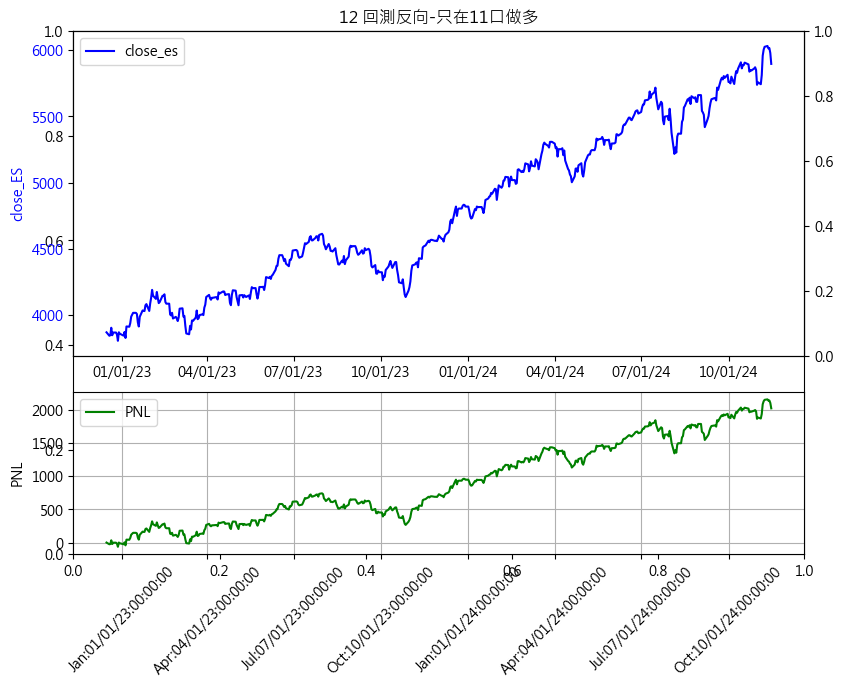

In [117]:
%matplotlib inline
df = results.copy()
# df['ts'] = pd.to_datetime(df['ts'])
# df = df.set_index('ts')

# 假設您的數據已經在 df DataFrame 中
# 設置圖表風格
plt.style.use("default")

# 創建圖表和軸域
fig = plt.figure(figsize=(8, 6))
plt.title("12 回測反向-只在11口做多")

# 創建上下兩個子圖，height_ratios=[2, 1] 表示上圖高度是下圖的2倍
gs = fig.add_gridspec(2, 1, height_ratios=[2, 1], hspace=0.15)
ax1 = fig.add_subplot(gs[0])
ax2 = ax1.twinx()  # 創建雙Y軸
ax3 = fig.add_subplot(gs[1])

# 繪製 close_x 在左Y軸
line1 = ax1.plot(df.index, df["Close"], color="blue", label="close_es")
ax1.set_ylabel("close_ES", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# 繪製 close_y 在右Y軸
# line2 = ax2.plot(df["ts"], df["close_zef"], color="red", label="close_zef")
# ax2.set_ylabel("close_zef", color="red")
# ax2.tick_params(axis="y", labelcolor="red")

# 添加圖例
lines = line1 #+ line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc="upper left")

# 繪製下方的 PNL 圖
ax3.plot(df.index, df["cum_pnl"], color="green", label="PNL")
ax3.set_ylabel("PNL")
ax3.legend(loc="upper left")

# 設置 x 軸格式
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%D"))

for ax in [ax3]:
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b:%D:%H:%M:%S"))
    plt.xticks(rotation=45)
    ax.grid(True)

# 只在底部子圖顯示 x 軸標籤
# ax1.set_xticklabels([])

# 調整布局
plt.tight_layout()
# 顯示圖表
plt.show()

如果buyandhold
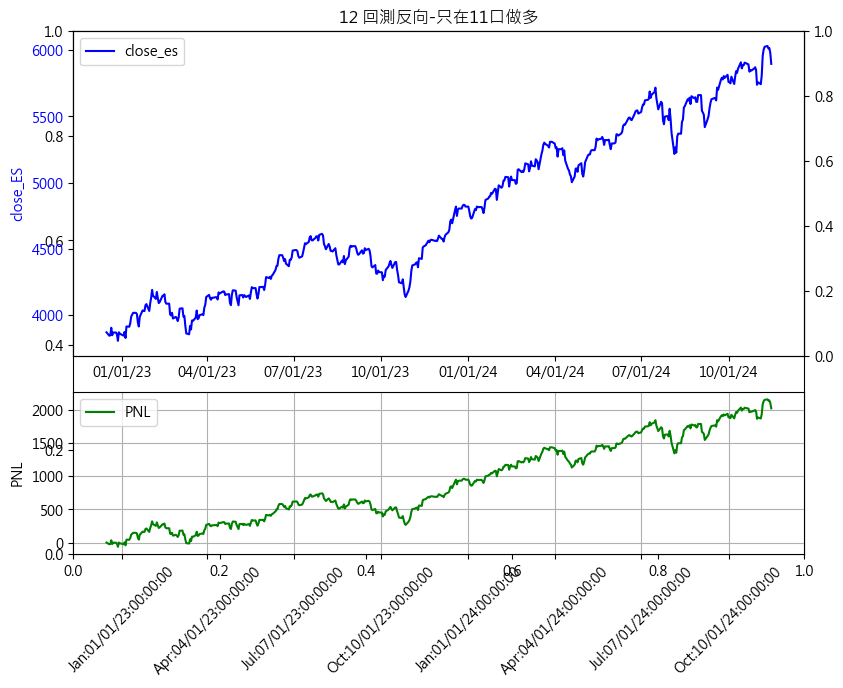
----
整體績效': {'交易筆數': 499,
  '獲利筆數': 266,
  '虧損筆數': 213,
  '勝率': 0.533066132264529,
  '總獲利': 2106.780029296875,
  '平均每筆交易獲利': 4.222004066727204,
  '最大單筆獲利': 146.0,
  '最大單筆虧損': -158.5,
  '夏普比率': 1.620088019094443,
  'S&P夏普': 1.6248740459421824,
  '獲利因子': 1.3434885584895784,
  '最大回撤(MDD)': inf,
  '平均持倉時間': 0.0,
  '最大連續虧損次數': 6,
  '最大連續獲利次數': 8},


=== 回測報告 ===

總報酬率: 51.18%  
年化報酬率: 23.16%  
最大回撤: -10.00%   
夏普比率: 1.51  
Sortino比率: 2.84  
交易次數: 498  
獲利交易比率: 53.21%  
收益/風險比: 1.34  
Calmar比率: 2.31  


In [96]:
# 假設 df 包含 S&P 500 的日收盤價數據
df["Returns"] = df["Close"].pct_change()  # 計算日回報率

# 檢查是否有足夠數據計算夏普率
if len(df) > 1 and df["Returns"].std() != 0:
    sharpe_ratio = np.sqrt(252) * (df["Returns"].mean()) / df["Returns"].std()
else:
    sharpe_ratio = 0

print(f"S&P 500 夏普率: {sharpe_ratio}")

risk_free_rate = 0.02 / 252  # 將無風險利率年化轉為日化
df["Excess_Returns"] = df["Returns"] - risk_free_rate  # 計算超額回報

# 使用超額回報計算夏普率
if len(df) > 1 and df["Excess_Returns"].std() != 0:
    sharpe_ratio = (
        np.sqrt(252) * df["Excess_Returns"].mean() / df["Excess_Returns"].std()
    )
else:
    sharpe_ratio = 0

print(f"S&P 500 調整後夏普率: {sharpe_ratio}")

S&P 500 夏普率: 1.7196295737555427
S&P 500 調整後夏普率: 1.563854240219601


##### 繪製進場以後的損益常態分佈

In [90]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
df=test_predict.copy()

changes_origin = []
for i in range(len(df) - 1):
    if 1:#df.iloc[i]["operation"] ==1:
        change = df.iloc[i + 1]["ES_Close"] - df.iloc[i]["ES_Close"]
        changes_origin.append(change)

mean_origin = np.mean(changes_origin)
std_origin = np.std(changes_origin)
print(mean_origin,std_origin)

changes_pred = []
for i in range(len(df) - 1):
    if df.iloc[i]["operation"] ==0:
        change = df.iloc[i + 1]["ES_Close"] - df.iloc[i]["ES_Close"]
        changes_pred.append(change)

mean_pred = np.mean(changes_pred)
std_pred = np.std(changes_pred)
print(mean_pred,std_pred)

4.061623246492986 38.4063037828306
-1.6961509829661885 35.729617762480345


Origin mean: 0.08765146243785978 std: 0.8017536001704768
Pred mean: -0.01883559133779822 std: 0.800433719722643


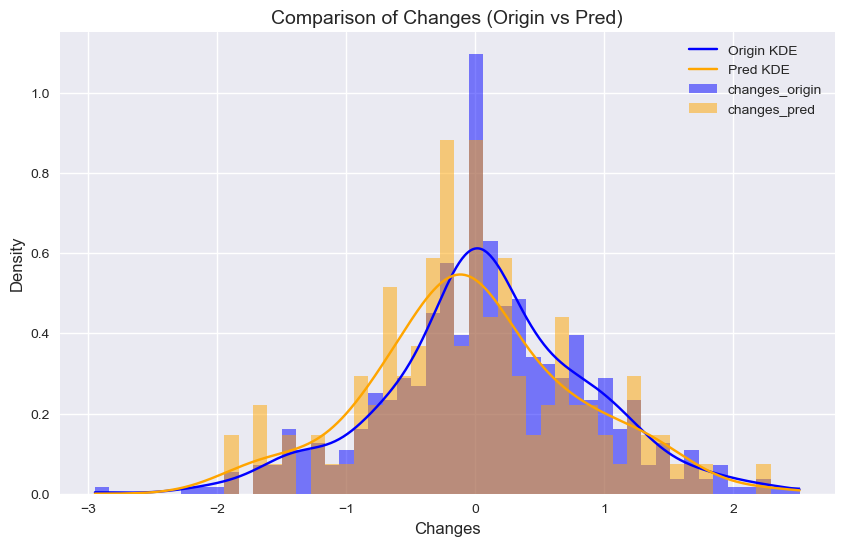

In [91]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 假設 df 已經存在並包含需要的數據
df = test_predict.copy()

# 計算 changes_origin
changes_origin = []
for i in range(len(df) - 1):
    if 1:  # 替換條件
        change = (df.iloc[i + 1]["ES_Close"] - df.iloc[i]["ES_Close"])/df.iloc[i]["ES_Close"]*100
        changes_origin.append(change)

# 計算 changes_pred
changes_pred = []
for i in range(len(df) - 1):
    if df.iloc[i]["operation"] == 0:  # 替換條件
        change = (df.iloc[i + 1]["ES_Close"] - df.iloc[i]["ES_Close"])/df.iloc[i]["ES_Close"]*100
        changes_pred.append(change)

# 計算均值和標準差
mean_origin = np.mean(changes_origin)
std_origin = np.std(changes_origin)
mean_pred = np.mean(changes_pred)
std_pred = np.std(changes_pred)

print("Origin mean:", mean_origin, "std:", std_origin)
print("Pred mean:", mean_pred, "std:", std_pred)

# 繪圖
plt.figure(figsize=(10, 6))

# 設置 bins
bins = np.linspace(
    min(min(changes_origin), min(changes_pred)),
    max(max(changes_origin), max(changes_pred)),
    50
)

# 繪製直方圖
plt.hist(changes_origin, bins=bins, density=True, alpha=0.5, color='blue', label='changes_origin')
plt.hist(changes_pred, bins=bins, density=True, alpha=0.5, color='orange', label='changes_pred')

# 計算分佈曲線
kde_origin = gaussian_kde(changes_origin)
kde_pred = gaussian_kde(changes_pred)

x_vals = np.linspace(min(bins), max(bins), 500)
plt.plot(x_vals, kde_origin(x_vals), color='blue', label='Origin KDE')
plt.plot(x_vals, kde_pred(x_vals), color='orange', label='Pred KDE')

# 添加圖例和標題
plt.title("Comparison of Changes (Origin vs Pred)", fontsize=14)
plt.xlabel("Changes", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.grid(True)

# 顯示圖表
plt.show()


預測前  
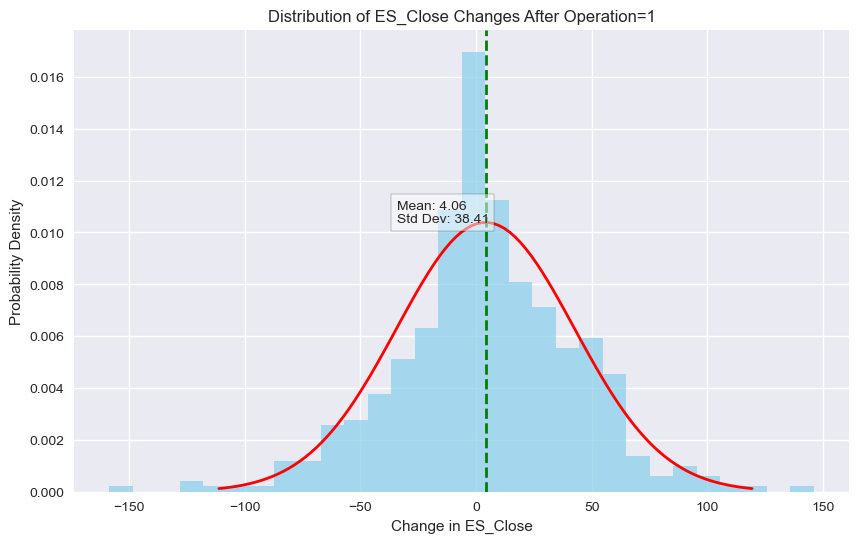  
預測後  
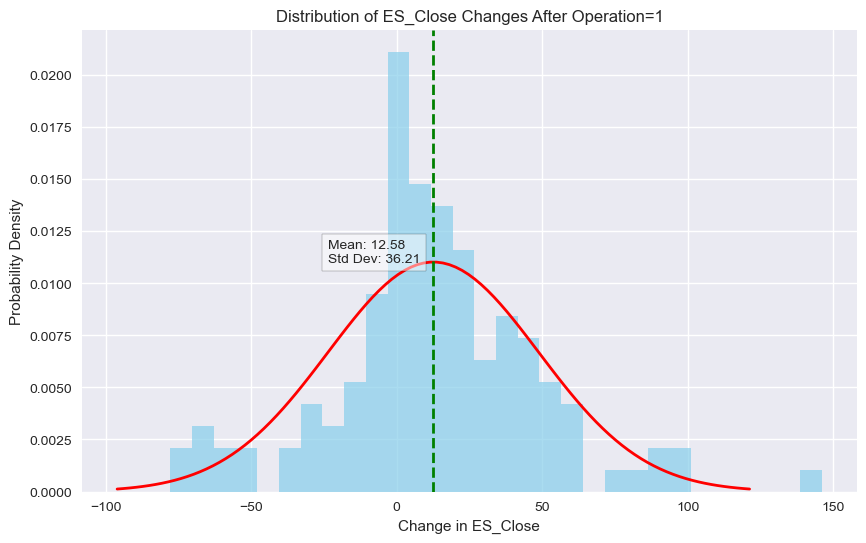  

預測上漲  
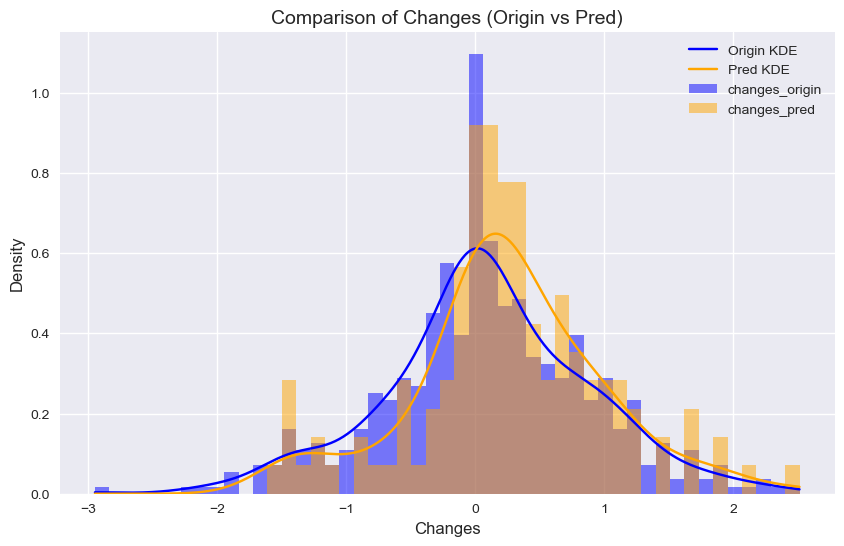  
預測下跌  
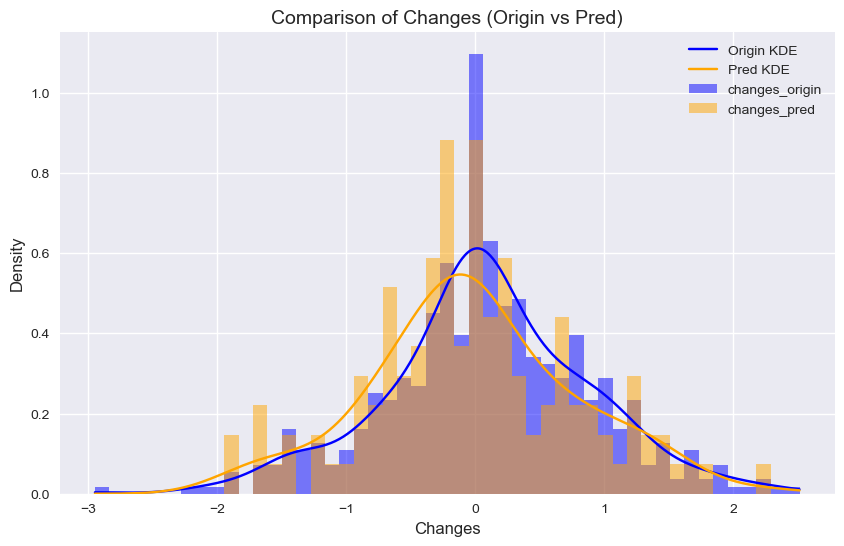  
Origin mean: 0.08765146243785978 std: 0.8017536001704768
Pred mean: -0.01883559133779822 std: 0.800433719722643
